# Домашнее задание к лекции «Доверительные интервалы»

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
</div>

In [2]:
Z = 1.96  # 95%   # Квантиль нормального распределения. 
sigma = 225**0.5  # Стандартное отклонение
Delta = 3        #Погрешность или желаемая точность

In [3]:
# минимальный объем выборки
N = ((sigma*Z)/Delta)**2
N

96.03999999999998

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.
</div>

In [4]:
Xmean = 130
n = 25
sigma = 12
confidence = 0.98

In [6]:
Z = stats.t.ppf((1 + confidence)/2, n)
Z

2.4851071754106413

In [7]:
delta = sigma*Z/(n**0.5)
delta

5.964257220985539

In [8]:
print(" 98% доверительный интервал для среднего значения от", round(Xmean - delta,2)," до ", round(Xmean + delta,2))

 98% доверительный интервал для среднего значения от 124.04  до  135.96


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [9]:
population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

In [10]:
t , p  = stats.ttest_ind(population_men, population_women)
print("t = " + str(t))
print("p = " + str(p))

t = 2.1043534057478923
p = 0.03534765325547762


p-value > $\alpha$ - нет оснований отвергать нулевую гипотезу, различие между выборками незначительно.

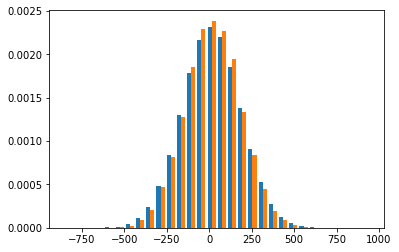

In [11]:
plt.hist([population_men,population_women], bins=30, density=True, label='population_men');

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [12]:
Z = 1.96  # 95%   # Квантиль нормального распределения. 
sigma = 150  # Стандартное отклонение
Delta = 50        #Погрешность

In [13]:
# минимальный объем выборки
N = ((sigma*Z)/Delta)**2
N

34.5744

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [14]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [15]:
oddsratio, pvalue = stats.fisher_exact(observations)
print(oddsratio, pvalue)

0.5811965811965812 0.35417955365927367


Получили больше значение pvalue равное 0.35, что значительно больше уровня значимости (0.05). Мы принимаем нулевую  гипотезу о независимости реальных погодных данных и ответов волшебника, то есть волшебник угадывал погоду случайно.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [16]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [23]:
def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [24]:
confidence = 0.9

In [25]:
mean_confidence_interval(data, confidence)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [26]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [27]:
stats.ttest_ind(data_1, data_2)

Ttest_indResult(statistic=7.35744682757447, pvalue=2.1159475572725764e-11)

pvalue=2.116e-11, значит, нулевая гипотеза о равенстве средних отклоняется.
- Таким образом, выборки не принадлежат одному множеству
- Посмотрим различия визуально:

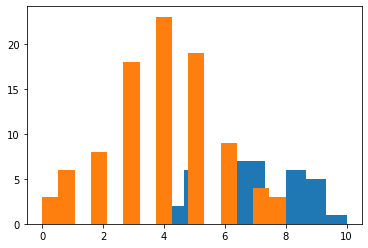

In [30]:
plt.hist(data_1, bins=15); #Выборка A
plt.hist(data_2, bins=15);  #Выборка B

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Ваши выводы: 
 - при уровне значимости большем p-value, то есть больше чем 0,03 нулевая гипотеза отвергается, распределение ненормальное
 - при уровне значимости меньшем p-value, принимается нулевая гипотеза распределение нормальное.
* При общепринятом уровне значимости 0,05 получаем, что p-value < 0.05 и считаем, что переменная не подчиняется нормальному распределению.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [31]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

In [32]:
 stats.ttest_ind(A, B, equal_var=False)

Ttest_indResult(statistic=1.8847229265385363, pvalue=0.05995260332765237)

* pvalue равен почти 0.06, что больше чем уровеня значимости 0,05, это означает, что нет оснований отвергать нулевую гипотезу о равенстве средних, то есть различие между препаратами A и B мало. 
* различия были бы значимы при pvalue<0.05

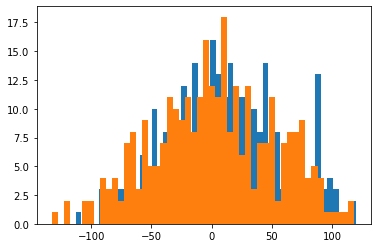

In [34]:
plt.hist(A, bins=50);
plt.hist(B, bins=50);